# Problemas avançados: crescimento populacional

Jeanlex Soares de Sousa (jeanlex@fisica.ufc.br) <br>
Departamento de Física <br>
Universidade Federal do Ceará

Um modelo físico simples que descreve o crescimento populacional levando-se em conta nascimento e morte dos membros da população e:

$$\frac{d N}{d t} = a N  - b N^2$$

onde $N$ descreve o número de indivíduos na população, o termo $a N$ descreve nascimento de novos membros, e $b N^2$ descreve a morte dos membros da população. O termo de morte é não linear e proporcional a $N^2$ para descrever que a oferta de comida diminui à medida que a população cresce. 

Para $b = 0$, esta equação tem solução analítica simples:

$$N(t) = N_0 e^{a t},$$

indicando que, sem mortes, a população cresce exponencialmente. Contudo, para $b=0$, a solução analítica não é trivial. E temos de resolver este problema somente na forma numérica. A discretização da equação diferencial acima usando a derivada progressiva torna-se:

$$\frac{d N}{d t} \approx \frac{N(t+\Delta t)-N(t)}{\Delta t}$$

$$N(t+\Delta) \approx N(t)(1+a\Delta t) -b \Delta t N^2(t)$$

Generalizando-se a expressão acima para qualquer instante $t_i$, obtem=se:

$$N_{i+1} = N_i(1+a \Delta t) -  b\Delta t N_i^2$$

Devido a falta de solução analítica para $b\neq0$, a comparação entre resultados teórico e numérico deve ser feita apenas nolimite que há solução analítica. Em geral, a comparação das soluções analítica e numérica nas condições em que haja solução analítica serve como testar o programa. 


## Código com vetorização


### Carregando bibliotecas e definição prévia de funções

In [10]:
# -----------------------------------------
# Carregando bibliotecas numérica e gráfica
# -----------------------------------------
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------------------
# função para calcular a solução exata
# -----------------------------------------
def fpop(t,a,N0):
    return N0*np.exp(a*t)

# -----------------------------------------
# função para calcular a solução numérica
# -----------------------------------------
def fpop_disc(t,a,b,N0):
    
    # esta função recebe um vetor contendo todos os instantes de tempo t_i do problema
    # e determina o tamanho deste vetor
    nt = len(t)
    
    # calcula o passo dt assumindo que o vetor dos instantes é uniforme
    dt = t[1] - t[0]
    
    #cria um vetor de população com o mesmo tamanho da lista contendo os instantes t_i
    N = np.zeros(nt)
    
    # preenche a condição inicial da população N[0] = v0
    N[0] = N0

    # a partir da equação discretizada, calcula os valores da velocidade N_i nos instantes t_i
    for i in range(1,nt): N[i] = (1+a*dt)*N[i-1] - b*dt*(N[i-1]**2)
    return N

### Parte principal do programa

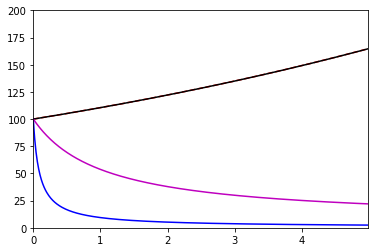

In [21]:
# -----------------------------------------
# inicialização de variáveis
# -----------------------------------------

dt = 0.01          # time step increment
nt = 500          # number of time steps
N0 = 100          # N(0)
a  = 0.1            # acceleration
b1  = 0.0
b2  = 0.1
b3  = 0.01


Tmax = (nt-1)*dt  # this is not an input variable
                  # it only calculates the total time 
    
# -----------------------------------------
# lista para armazenar t e N(t)
# -----------------------------------------

# cria lista dos t_i com Nt elementos todos inicialmente zerados
time = np.linspace(0, Tmax, nt)

# para b1 temos solucao analítica e numérica
N_theory_b1 = fpop(time,a,N0)   # vecolicdade teórica
N_num_b1 = fpop_disc(time,a,b1,N0) # velocidade numérica

# para b2 e b3 temos apenas solução analítica
N_num_b2 = fpop_disc(time,a,b2,N0) # velocidade numérica
N_num_b3 = fpop_disc(time,a,b3,N0) # velocidade numérica

# -----------------------------------------
# plotagem dos resultados numérico e teórico
# -----------------------------------------
    
plt.plot(time,N_theory_b1,'r--',
         time,N_num_b1,'k',
         time,N_num_b2,'b',         
         time,N_num_b3,'m')

plt.axis([0, Tmax, 0, 200])
plt.show()

## Sugestões de estudo

* Resolva os problemas 1.4 e 1.5 do livro-texo